# Load data images from disk

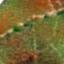

In [2]:
import os
from keras.preprocessing import image

base_dir = '/tf/data'

# Directories for training and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#Directory with training coffee pictures
train_coffee_dir = os.path.join(train_dir, 'coffee')
# Directory with training noncoffee pictures
train_noncoffee_dir = os.path.join(train_dir, 'noncoffee')

#Directory with validation coffee pictures
validation_coffee_dir = os.path.join(validation_dir, 'coffee')
# Directory with training noncoffee pictures
validation_noncoffee_dir = os.path.join(validation_dir, 'noncoffee')

# Directory with test coffee pictures
test_coffee_dir = os.path.join(test_dir, 'coffee')
# Directory with test noncoffee pictures
test_noncoffee_dir = os.path.join(test_dir, 'noncoffee')


img = image.load_img(os.path.join(train_coffee_dir, 
                os.listdir(train_coffee_dir)[3]))

img.show()    # To show the image

# Instantiating the convnet

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

From the 2nd edition of the book "Deep Learning with Python", chapter 8 - Instrantiating a small convnet for dogs vs. cats classification

# Dataset from directories

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
            train_dir,
            image_size = img.size,
            batch_size = 32)
validation_dataset = image_dataset_from_directory(
            validation_dir,
            image_size = img.size,
            batch_size = 32)
test_dataset = image_dataset_from_directory(
            test_dir,
            image_size = img.size,
            batch_size = 32)

Found 1802 files belonging to 2 classes.
Found 598 files belonging to 2 classes.
Found 476 files belonging to 2 classes.


## DATA AUGMENTATION LAYER

<Figure size 1000x1000 with 0 Axes>

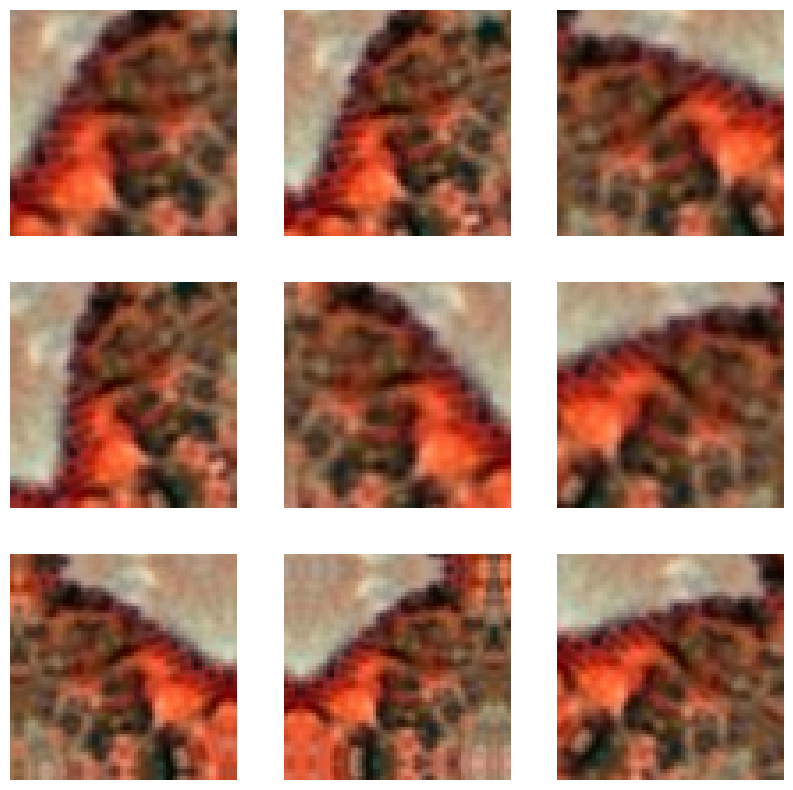

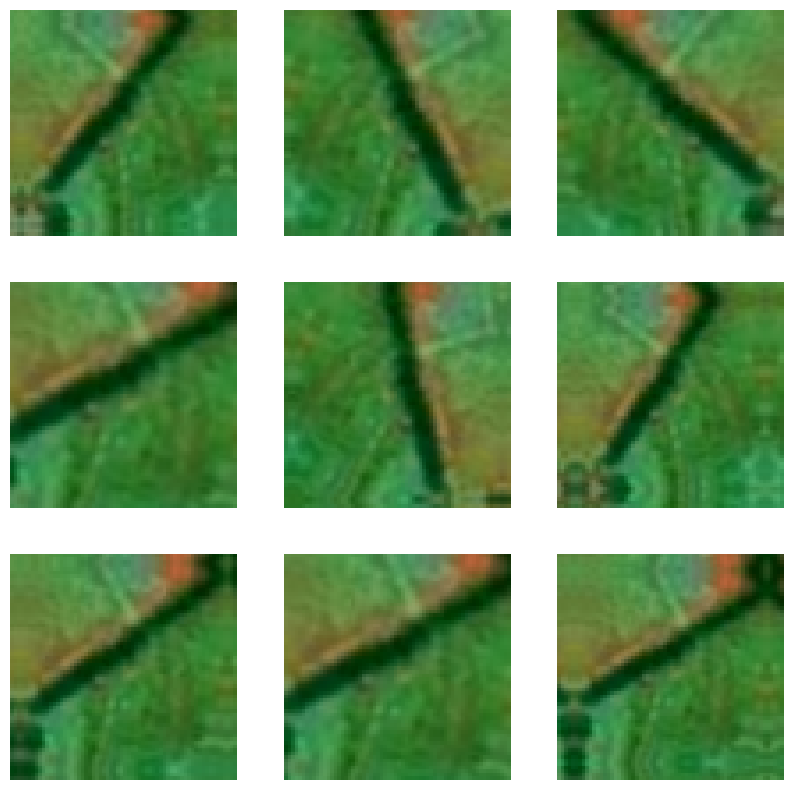

In [10]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

In [11]:
inputs = keras.Input(shape=(img.size[0], img.size[1], 3))
# DATA AUGMNETATION
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)        # Rescale to the [0, 1] range
                                            # by dividing by 255.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                         

In [13]:
model.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

# Training

In [14]:
history = model.fit(
            train_dataset,
            epochs=30,
            validation_data=validation_dataset)

Epoch 1/30
57/57 [==============================] - 2s 9ms/step - loss: 0.6268 - accuracy: 0.6665 - val_loss: 0.8910 - val_accuracy: 0.5836
Epoch 2/30
57/57 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.7425 - val_loss: 0.4767 - val_accuracy: 0.7575
Epoch 3/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4871 - accuracy: 0.7747 - val_loss: 0.4376 - val_accuracy: 0.7926
Epoch 4/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.7936 - val_loss: 0.5438 - val_accuracy: 0.7592
Epoch 5/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8119 - val_loss: 0.4649 - val_accuracy: 0.7659
Epoch 6/30
57/57 [==============================] - 0s 6ms/step - loss: 0.3735 - accuracy: 0.8324 - val_loss: 0.4363 - val_accuracy: 0.7726
Epoch 7/30
57/57 [==============================] - 0s 6ms/step - loss: 0.3640 - accuracy: 0.8413 - val_loss: 0.3550 - val_accuracy: 0.8495
Epoch 8/30
57/57 [==

# Plot

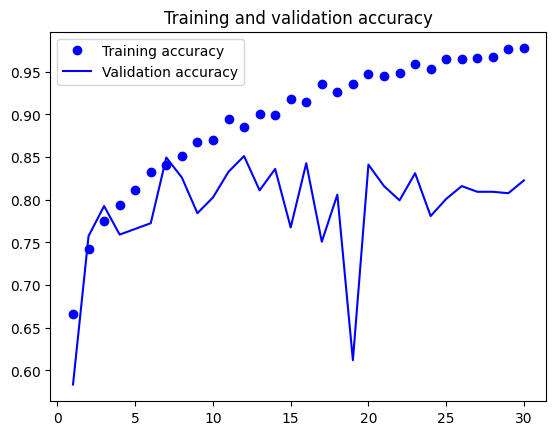

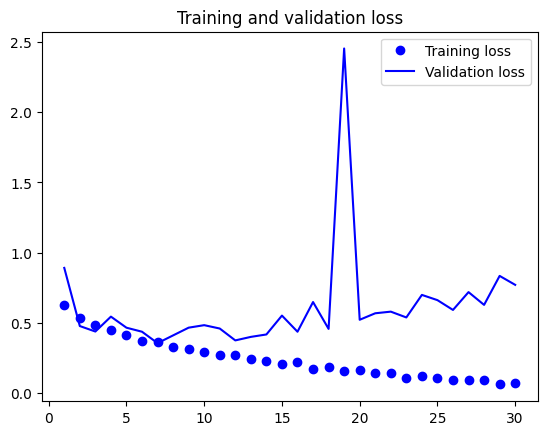

In [15]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()